In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")


#1). EDA (Exploratory data analysis)

In [ ]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [ ]:
print(train_data.describe())

                  id            age  alcohol_consumption_per_week  \
count  700000.000000  700000.000000                 700000.000000   
mean   349999.500000      50.359734                      2.072411   
std    202072.738554      11.655520                      1.048189   
min         0.000000      19.000000                      1.000000   
25%    174999.750000      42.000000                      1.000000   
50%    349999.500000      50.000000                      2.000000   
75%    524999.250000      58.000000                      3.000000   
max    699999.000000      89.000000                      9.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       700000.000000  700000.000000        700000.000000   
mean                            80.230803       5.963695             7.002200   
std                             51.195071       1.463336             0.901907   
min                              1.000000       0.1000

In [ ]:
object_columns = train_data.select_dtypes(include=['object']).columns
print(object_columns)

Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'smoking_status', 'employment_status'],
      dtype='object')


In [ ]:
df_object_columns_unique = train_data.nunique()
df_object_columns_unique.columns = object_columns
print(df_object_columns_unique)

id                                    700000
age                                       71
alcohol_consumption_per_week               9
physical_activity_minutes_per_week       565
diet_score                                99
sleep_hours_per_day                       69
screen_time_hours_per_day                151
bmi                                      231
waist_to_hip_ratio                        36
systolic_bp                               71
diastolic_bp                              54
heart_rate                                60
cholesterol_total                        154
hdl_cholesterol                           69
ldl_cholesterol                          151
triglycerides                            228
gender                                     3
ethnicity                                  5
education_level                            4
income_level                               5
smoking_status                             3
employment_status                          4
family_his

In [ ]:
df_test_object_columns_unique = test_data.nunique()
df_test_object_columns_unique.columns = object_columns
print(df_test_object_columns_unique)

id                                    300000
age                                       71
alcohol_consumption_per_week               9
physical_activity_minutes_per_week       544
diet_score                                99
sleep_hours_per_day                       68
screen_time_hours_per_day                147
bmi                                      230
waist_to_hip_ratio                        37
systolic_bp                               77
diastolic_bp                              54
heart_rate                                60
cholesterol_total                        165
hdl_cholesterol                           68
ldl_cholesterol                          165
triglycerides                            237
gender                                     3
ethnicity                                  5
education_level                            4
income_level                               5
smoking_status                             3
employment_status                          4
family_his

In [ ]:
for col in object_columns:
    counts = train_data[col].value_counts()
    print(f"\nColumn: '{col}' (Total Unique Values: {len(counts)})")

    for value, count in counts.items():
        print(f"  Value: '{value}' | Count: {count}")


Column: 'gender' (Total Unique Values: 3)
  Value: 'Female' | Count: 363237
  Value: 'Male' | Count: 333085
  Value: 'Other' | Count: 3678

Column: 'ethnicity' (Total Unique Values: 5)
  Value: 'White' | Count: 386153
  Value: 'Hispanic' | Count: 129984
  Value: 'Black' | Count: 106301
  Value: 'Asian' | Count: 60120
  Value: 'Other' | Count: 17442

Column: 'education_level' (Total Unique Values: 4)
  Value: 'Highschool' | Count: 344145
  Value: 'Graduate' | Count: 261268
  Value: 'Postgraduate' | Count: 79642
  Value: 'No formal' | Count: 14945

Column: 'income_level' (Total Unique Values: 5)
  Value: 'Middle' | Count: 290557
  Value: 'Lower-Middle' | Count: 178570
  Value: 'Upper-Middle' | Count: 127836
  Value: 'Low' | Count: 85803
  Value: 'High' | Count: 17234

Column: 'smoking_status' (Total Unique Values: 3)
  Value: 'Never' | Count: 494448
  Value: 'Current' | Count: 103363
  Value: 'Former' | Count: 102189

Column: 'employment_status' (Total Unique Values: 4)
  Value: 'Employ

In [ ]:
for col in object_columns:
    counts = test_data[col].value_counts()
    print(f"\nColumn: '{col}' (Total Unique Values: {len(counts)})")

    for value, count in counts.items():
        print(f"  Value: '{value}' | Count: {count}")


Column: 'gender' (Total Unique Values: 3)
  Value: 'Female' | Count: 154098
  Value: 'Male' | Count: 144102
  Value: 'Other' | Count: 1800

Column: 'ethnicity' (Total Unique Values: 5)
  Value: 'White' | Count: 168375
  Value: 'Hispanic' | Count: 53534
  Value: 'Black' | Count: 45203
  Value: 'Asian' | Count: 25077
  Value: 'Other' | Count: 7811

Column: 'education_level' (Total Unique Values: 4)
  Value: 'Highschool' | Count: 153355
  Value: 'Graduate' | Count: 105440
  Value: 'Postgraduate' | Count: 34118
  Value: 'No formal' | Count: 7087

Column: 'income_level' (Total Unique Values: 5)
  Value: 'Middle' | Count: 124249
  Value: 'Lower-Middle' | Count: 76285
  Value: 'Upper-Middle' | Count: 54624
  Value: 'Low' | Count: 36816
  Value: 'High' | Count: 8026

Column: 'smoking_status' (Total Unique Values: 3)
  Value: 'Never' | Count: 211666
  Value: 'Former' | Count: 44438
  Value: 'Current' | Count: 43896

Column: 'employment_status' (Total Unique Values: 4)
  Value: 'Employed' | Cou

In [ ]:
TARGET = 'diagnosed_diabetes'

In [ ]:
print(train_data[TARGET].value_counts())

diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64


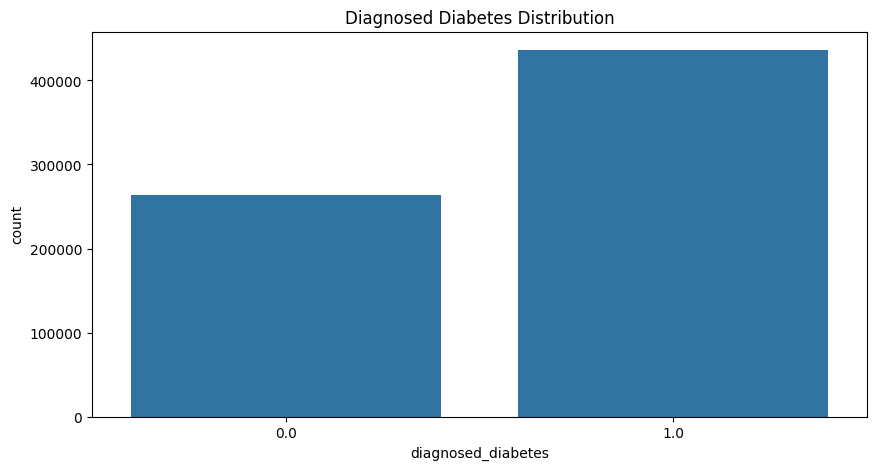

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=TARGET, data=train_data)
plt.title('Diagnosed Diabetes Distribution')
plt.show()

#2). Data cleaning and Encoding

# Ordinal Encoding

In [ ]:
income_mapping = {
    'Low': 1,
    'Lower-Middle': 2,
    'Middle': 3,
    'Upper-Middle': 4,
    'High': 5
}

train_data['encoded_income_level'] = train_data['income_level'].map(income_mapping)
test_data['encoded_income_level'] = test_data['income_level'].map(income_mapping)
train_data.drop(['income_level'], axis=1, inplace=True)
test_data.drop(['income_level'], axis=1, inplace=True)

In [ ]:
education_mapping = {
    'No formal': 1,
    'Highschool': 2,
    'Graduate': 3,
    'Postgraduate': 4
}

train_data['encoded_education_level'] = train_data['education_level'].map(education_mapping)
test_data['encoded_education_level'] = test_data['education_level'].map(education_mapping)
train_data.drop(['education_level'], axis=1, inplace=True)
test_data.drop(['education_level'], axis=1, inplace=True)


# For Nominal Features (One hot encoding)

In [ ]:
nominal_cols = ['gender', 'ethnicity', 'smoking_status', 'employment_status']
train_data = pd.get_dummies(train_data, columns=nominal_cols, drop_first=True)
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [ ]:
test_data = pd.get_dummies(test_data, columns=nominal_cols, drop_first=True)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  int64  
 2   alcohol_consumption_per_week        300000 non-null  int64  
 3   physical_activity_minutes_per_week  300000 non-null  int64  
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  int64  
 10  diastolic_bp                        300000 non-null  int64  
 11  heart_rate                

#3). Scaling numerical high range features.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = [
    'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week',
    'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day',
    'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp',
    'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
    'ldl_cholesterol', 'triglycerides'
]

scaler.fit(train_data[numerical_cols])
train_data[numerical_cols] = scaler.transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

#4). Feature Engineering.

In [ ]:
train_data['pulse_pressure'] = train_data['systolic_bp'] - train_data['diastolic_bp']
test_data['pulse_pressure'] = test_data['systolic_bp'] - test_data['diastolic_bp']
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  float64
 2   alcohol_consumption_per_week        700000 non-null  float64
 3   physical_activity_minutes_per_week  700000 non-null  float64
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  float64
 10  diastolic_bp                        700000 non-null  float64
 11  heart_rate                

In [ ]:
final_test_data = test_data.copy()

In [ ]:
print(final_test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  float64
 2   alcohol_consumption_per_week        300000 non-null  float64
 3   physical_activity_minutes_per_week  300000 non-null  float64
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  float64
 10  diastolic_bp                        300000 non-null  float64
 11  heart_rate                

In [ ]:
# Remove the 'id' column from the training and testing datasets
if 'id' in train_data.columns:
    train_data = train_data.drop('id', axis=1)
if 'id' in test_data.columns:
    test_data = test_data.drop('id', axis=1)

print("ID columns removed.")

ID columns removed.


In [ ]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 700000 non-null  float64
 1   alcohol_consumption_per_week        700000 non-null  float64
 2   physical_activity_minutes_per_week  700000 non-null  float64
 3   diet_score                          700000 non-null  float64
 4   sleep_hours_per_day                 700000 non-null  float64
 5   screen_time_hours_per_day           700000 non-null  float64
 6   bmi                                 700000 non-null  float64
 7   waist_to_hip_ratio                  700000 non-null  float64
 8   systolic_bp                         700000 non-null  float64
 9   diastolic_bp                        700000 non-null  float64
 10  heart_rate                          700000 non-null  float64
 11  cholesterol_total         

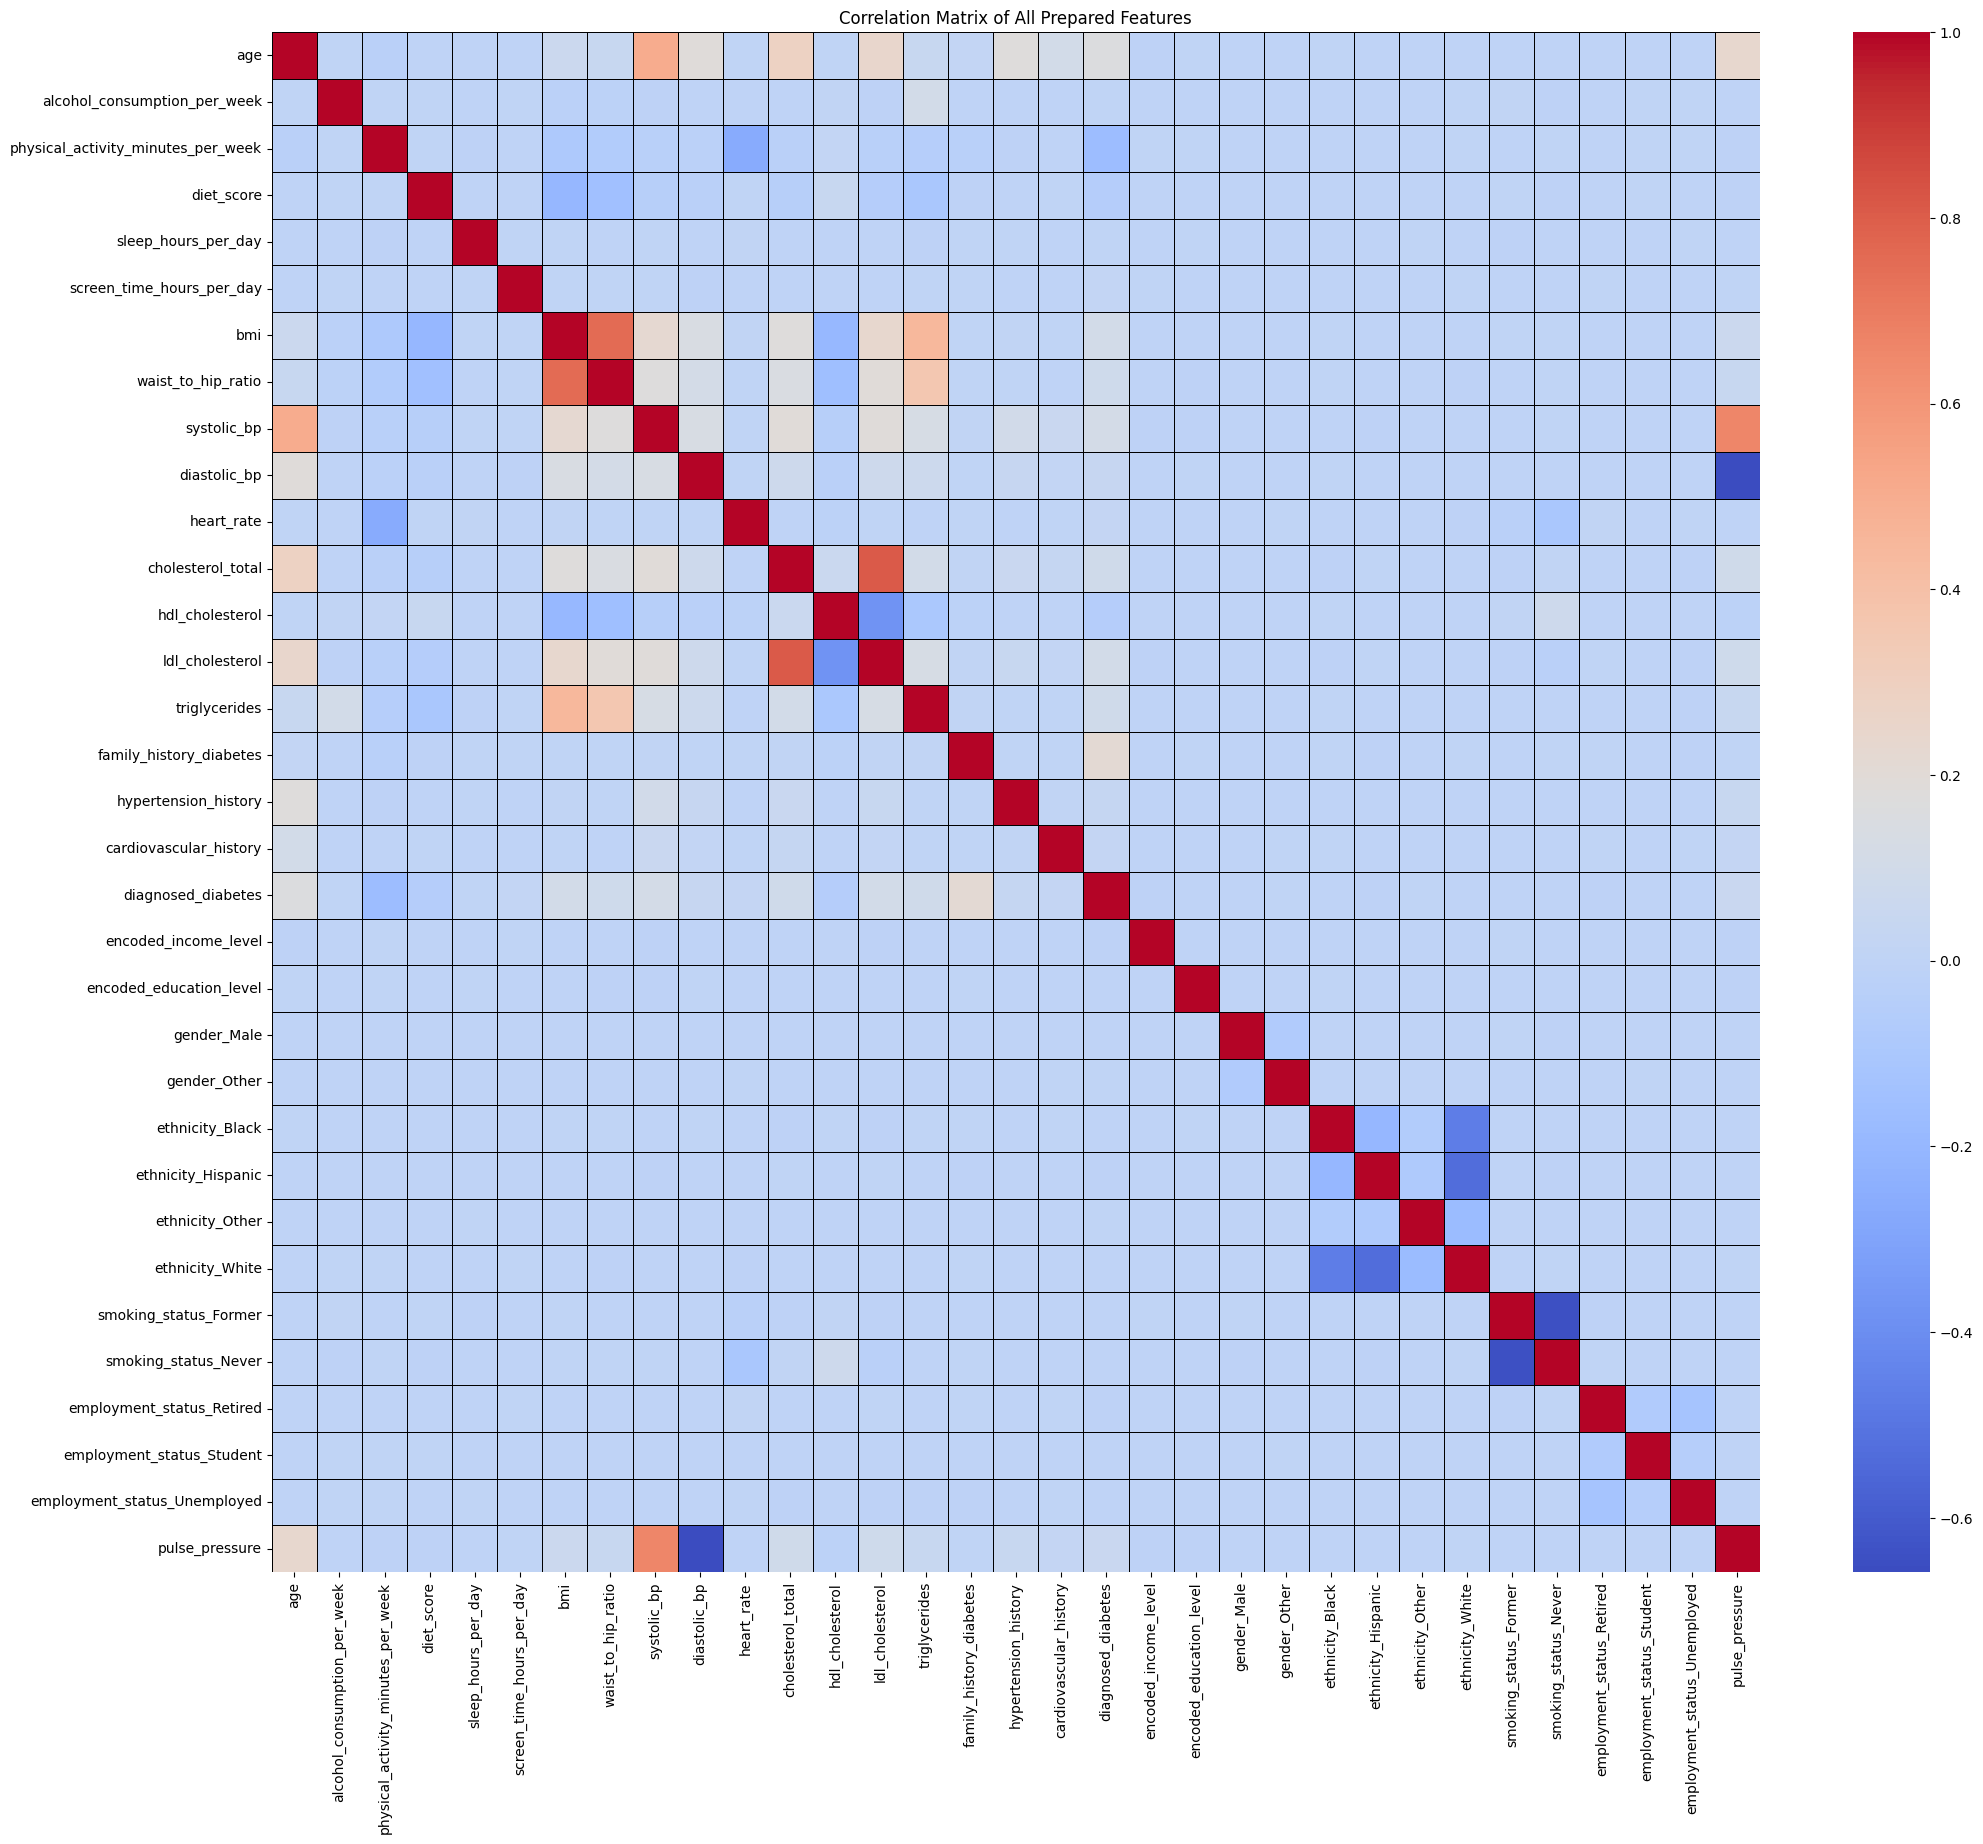

In [ ]:
import seaborn as sns
full_data = train_data
corr_matrix = full_data.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm',
            linewidths=.5, linecolor='black')
plt.title('Correlation Matrix of All Prepared Features')
plt.show()

#5). Model training.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = train_data.drop(TARGET, axis=1)
y = train_data[TARGET]

y = y.astype(int)

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Original Training Data Size: {len(X)}")
print(f"X_train (80%) Size: {len(X_train)}")
print(f"X_val (20%) Size: {len(X_val)}")

Original Training Data Size: 700000
X_train (80%) Size: 560000
X_val (20%) Size: 140000


# Using LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_val, y_pred)

print(f"\n--- Logistic Regression Baseline Model ---")
print(f"ROC-AUC Score on Validation Set: {roc_auc:.4f}")


--- Logistic Regression Baseline Model ---
ROC-AUC Score on Validation Set: 0.5990


# Using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

roc_auc = roc_auc_score(y_val, y_pred)

print(f"\n--- Random Forest Classifier Model ---")
print(f"ROC-AUC Score on Validation Set: {roc_auc:.4f}")


--- Random Forest Classifier Model ---
ROC-AUC Score on Validation Set: 0.6052


# Using XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='binary:logistic', # Since this is binary classification
    eval_metric='auc',           # Optimize for ROC-AUC
    use_label_encoder=False,     # Standard practice for modern XGBoost
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

roc_auc_xgb = roc_auc_score(y_val, y_pred_proba_xgb)

print(f"\n--- XGBoost Classifier Model ---")
print(f"ROC-AUC Score on Validation Set: {roc_auc_xgb:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:33:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Classifier Model ---
ROC-AUC Score on Validation Set: 0.7223


# Using GridSearchCV for cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.01]
}


grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("--- Grid Search Results ---")
print(f"Best ROC-AUC Score Found: {grid_search.best_score_:.4f}")
print(f"Optimal Hyperparameters: {grid_search.best_params_}")

best_params = grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:04:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Grid Search Results ---
Best ROC-AUC Score Found: 0.7251
Optimal Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}


#6). Running the model on splitted test data.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

best_model = grid_search.best_estimator_
print(best_model)

y_pred_proba_final = best_model.predict_proba(X_val)[:, 1]

y_pred_class = np.where(y_pred_proba_final >= 0.5, 1, 0)

print("\n--- Final Classification Report (on Validation Set) ---")
print(classification_report(y_val, y_pred_class, target_names=['No Diabetes (0)', 'Diabetes (1)']))

from sklearn.metrics import accuracy_score, f1_score
print(f"\nOverall Accuracy Score: {accuracy_score(y_val, y_pred_class):.4f}")
print(f"Overall F1 Score: {f1_score(y_val, y_pred_class):.4f}")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

--- Final Classification Report (on Validation Set) ---
                 precision    recall  f1-score   support

No Diabetes (0)       0.62      0.42      0.50     52739
   Diabetes (1)       0.71      0.84      0.77     87261

       accura

#7). Running model on final test data.

In [ ]:
from xgboost import XGBClassifier
import pandas as pd

best_params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}

final_xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    **best_params
)

final_xgb_model.fit(X, y)

test_predictions_proba = final_xgb_model.predict_proba(final_test_data.drop('id', axis=1))[:, 1]

submission_df = pd.DataFrame({
    'id': final_test_data['id'],
    'diagnosed_diabetes': test_predictions_proba
})

print("\n--- Sample Submission Data ---")
print(submission_df.head())

submission_df.to_csv('final_diabetes_submission.csv', index=False)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:28:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Sample Submission Data ---
       id  diagnosed_diabetes
0  700000            0.486459
1  700001            0.697810
2  700002            0.771707
3  700003            0.403508
4  700004            0.916150
